# Phase 3 Project

Student: Shilton Soi <br>
Student Pace: Part Time <br>
Instructor:

1. Noah Kandie
2. William Okomba



# Introduction

The telecommunications industry is highly competitive today, but it faces a common challenge: customer churn. Churn occurs when customers leave a business due to dissatisfaction with services or better offers from other providers. This can impact revenue and profitability. To address this, businesses strive to offer cutting-edge services and technology. Identifying potential churners in advance is crucial for retaining clients and improving business performance. This process is known as churn prediction.

# Data Understanding

The dataset is composed of 3333 records and 21 features. The 'churn' feature, which is a boolean, serves as the target variable. A value of True in this column indicates that the customer has churned, while False signifies retention, thus setting up a binary classification scenario. Among the remaining features, 4 are categorical and 16 are numerical.

# Problem Statement

In today’s fiercely competitive business landscape, companies face saturation across industries. SyriaTel, a telecommunications company, recognizes the urgency of customer retention. The high cost associated with acquiring new customers far outweighs the expense of maintaining existing ones. To stabilize their market value and mitigate losses from customer churn, SyriaTel is proactively implementing strategies to retain its client base. By identifying potential churners early, they aim to enhance customer satisfaction and overall business performance.

# Objectives

* To do exploratory data analysis on the data
* To fit different classification algorithm models to determine which one works best for churn prediction
* To select the best model
* To make predictions using the selected model
* To check the accuracy of the predicted variables

# Table of Contents



1. Data Preparation
2. Data cleaning
3. Exploratory Data Analysis
4. Data Pre-Processing
5. Modelling
6. Evaluation
7. Conclusion
8. Recommendation
9. Next Steps

# 1. Data Preparation

In [ ]:
# Importing neccessary libraries for Data Analysis, Visualisation and Modelling

import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy import stats

In [ ]:
# Loading and preview of the dataset
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
df.shape

(3333, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# 2. Data Cleaning

In [ ]:
#Adding underscore to column names
df0 = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
df0.columns = df0.columns.str.replace(' ', '_')
print(df0.columns)

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')


This makes it easier to work with the data programmatically.

In [ ]:
#Checking for null values
df0.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

No null values found

In [ ]:
#CHecking fot duplicates
df0[df0.duplicated(subset = ["phone_number"])]

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn


No duplicated entries found

In [ ]:
# Checking for placeholders
# Define a comprehensive list of potential placeholder values
common_placeholders = ["", "na", "n/a", "nan", "none", "null", "-", "--", "?", "??", "unknown", "missing", "void", "empty","#","#####"]

# Loop through each column and check for potential placeholders

found_placeholder = False
for column in df0.columns:
  unique_values = df0[column].unique()
  for value in unique_values:
    if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
      count = (df0[column] == value).sum()
      print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")

      found_placeholder = True

if not found_placeholder:
  print("No potential placeholders found in the DataFrame.")

No potential placeholders found in the DataFrame.


In [ ]:
#Handling Outliers
df1 = df0
def drop_numerical_outliers(df1, z_thresh=3):
    constrains = df1.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df1.drop(df1.index[~constrains], inplace=True)

drop_numerical_outliers(df1)
print(df1.shape)

(3169, 21)


# 3. Exploratory Data Analysis

In [ ]:
y = df1["churn"].value_counts()
y

churn
False    2727
True      442
Name: count, dtype: int64

<ipython-input-12-af0236e198bc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_percentages.index, y=churn_percentages.values, palette='Blues')


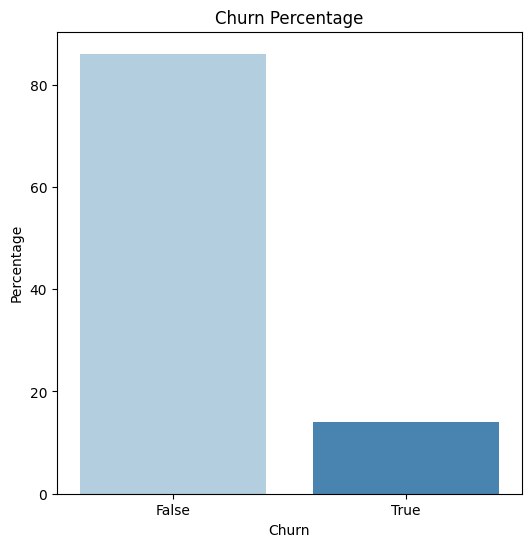

In [ ]:
churn_counts = df1['churn'].value_counts()
churn_percentages = churn_counts / churn_counts.sum() * 100

plt.figure(figsize=(6,6))
sns.barplot(x=churn_percentages.index, y=churn_percentages.values, palette='Blues')
plt.title("Churn Percentage")
plt.ylabel("Percentage")
plt.xlabel("Churn")
plt.show()

Number of churned customers is about 13.26% of the total customers

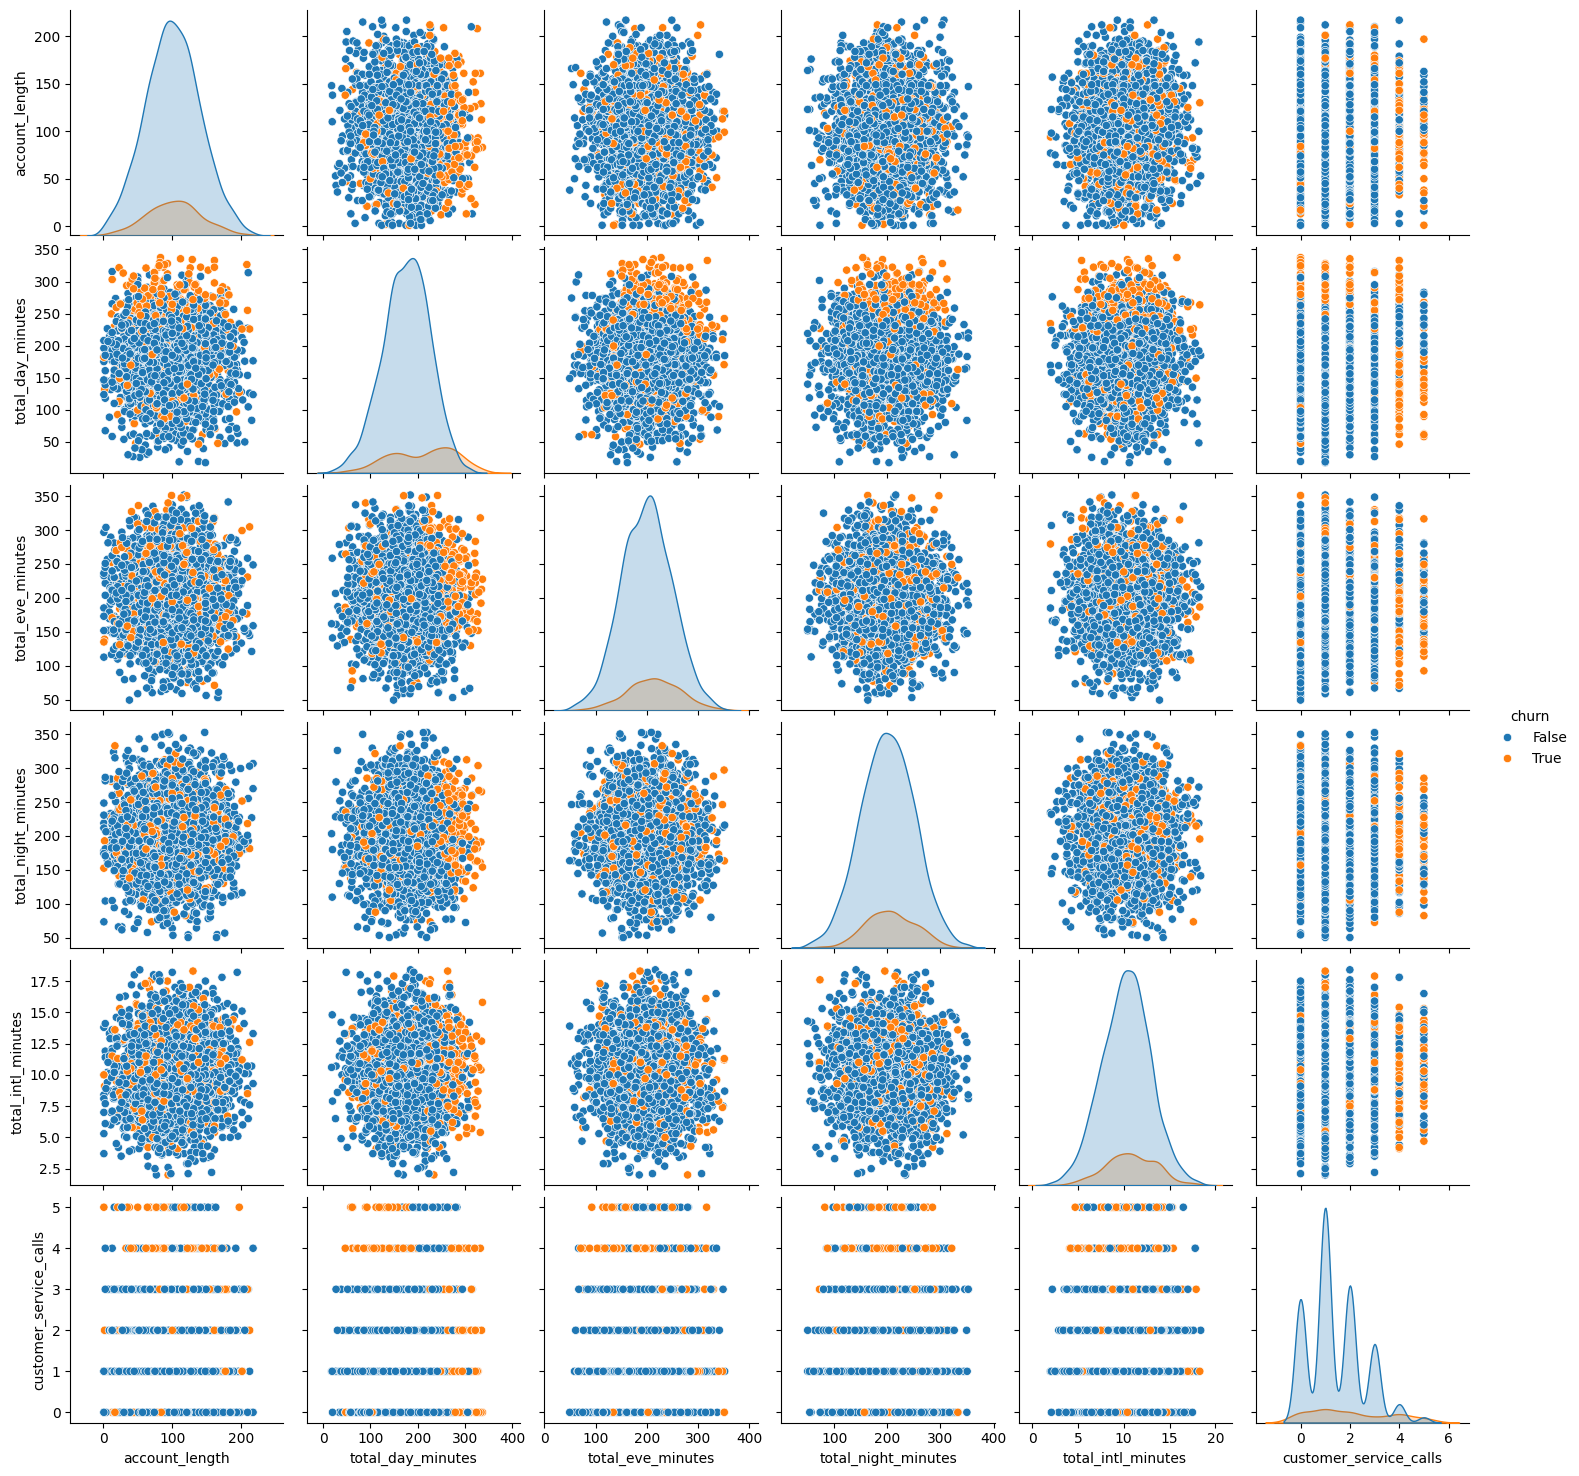

In [ ]:
# Select a subset of columns for pair plotting
selected_columns = ['account_length', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes', 'customer_service_calls', 'churn']
sns.pairplot(df1[selected_columns], hue='churn', diag_kind='kde')
plt.show()

**Customer Service Calls:** There is a noticeable trend where churned customers have higher customer service calls. This suggests that customers who frequently contact customer service are more likely to churn.<br>
**Total Day Minutes:** Churned customers tend to have higher total day minutes. While not a strong correlation, it's an important variable to consider.<br>
**Distribution Similarity:** For most variables like total evening minutes and total night minutes, the distributions between churned and non-churned customers are quite similar, indicating these variables alone may not be strong predictors of churn.<br>
**Pairwise Relationships:** The relationships between usage variables (day, evening, night, international minutes) show some positive correlation but do not strongly differentiate between churned and non-churned customers.

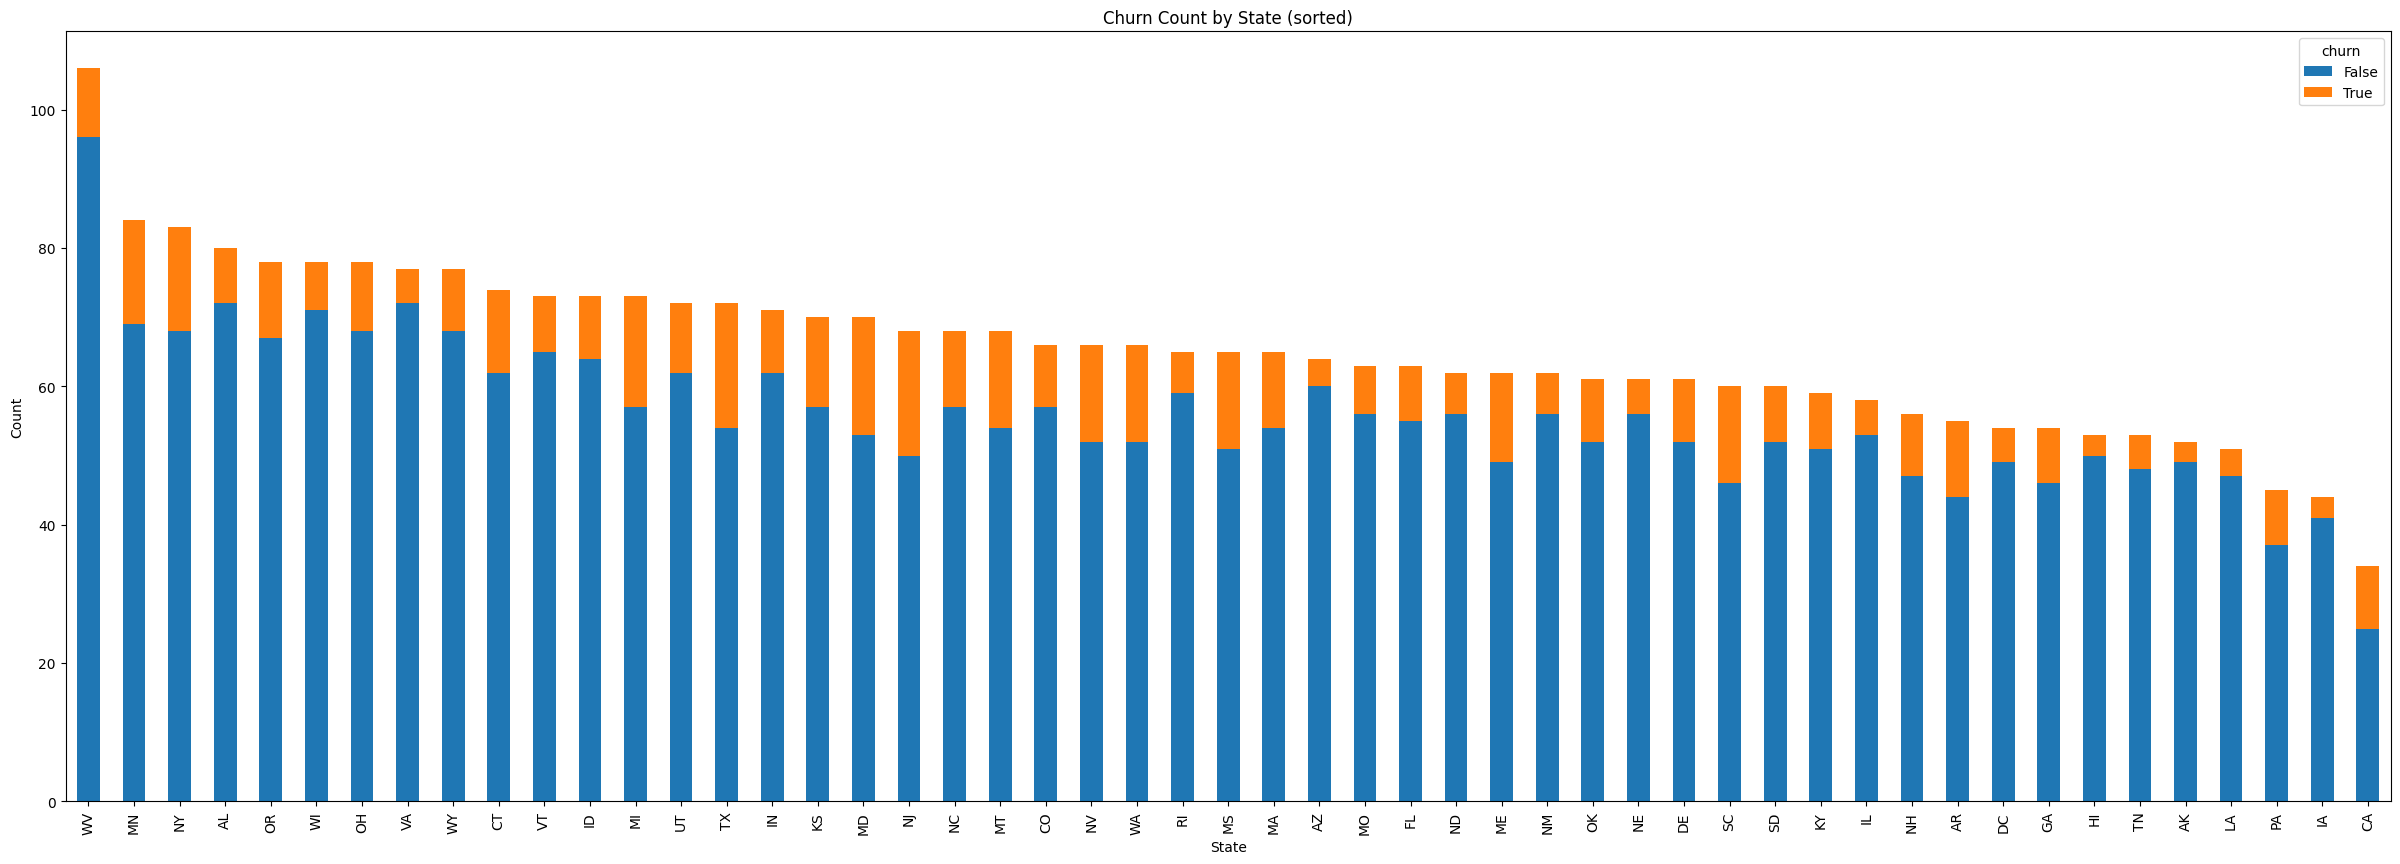

In [ ]:
# Group by state and churn
grouped = df.groupby(["state", "churn"]).size().unstack()

grouped['total'] = grouped.sum(axis=1)

# Sort the grouped data by the total count in descending order
sorted_grouped = grouped.sort_values(by='total', ascending=False).drop(columns='total')

sorted_grouped.plot(kind='bar', stacked=True, figsize=(30, 10))

# Display the plot
plt.title('Churn Count by State (sorted)')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

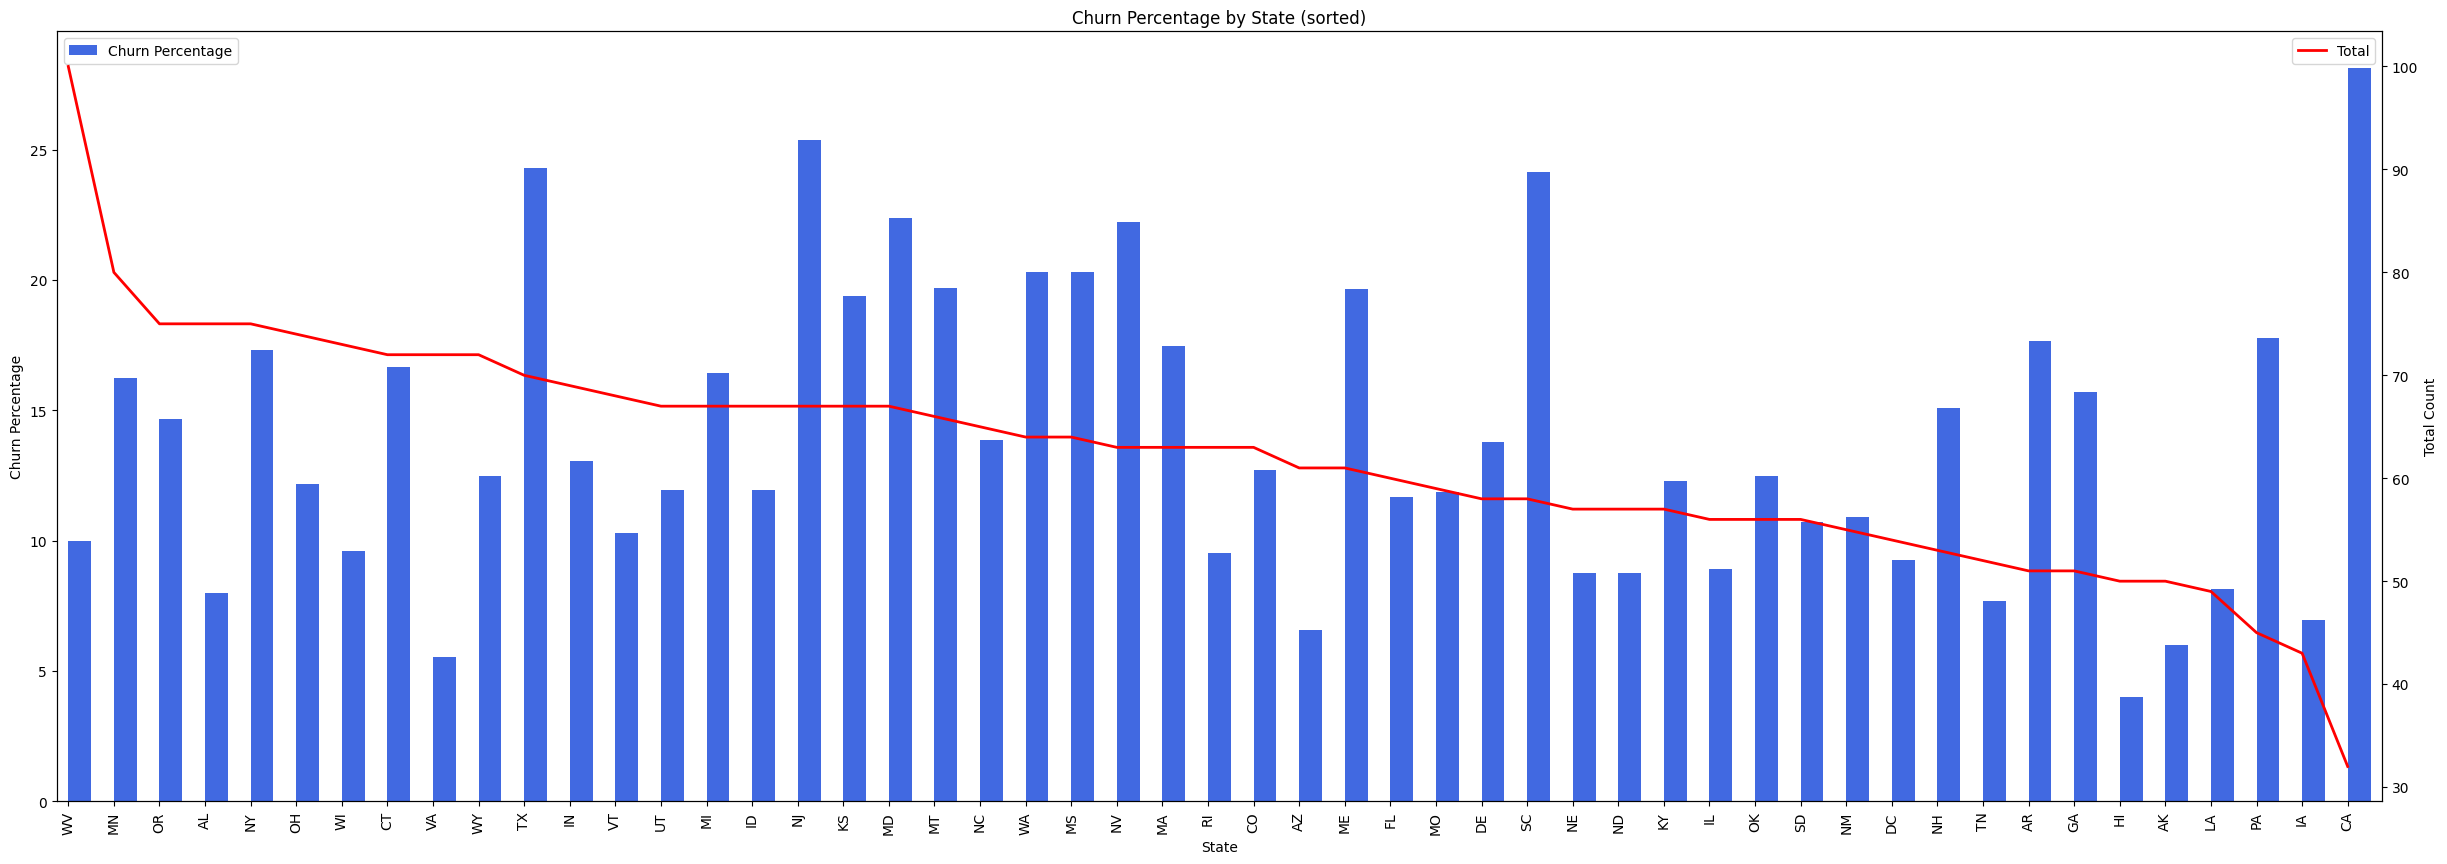

In [ ]:
# Group by state and churn, and count occurrences
grouped = df1.groupby(["state", "churn"]).size().unstack(fill_value=0)

# Calculate the total count for each state
grouped['total'] = grouped.sum(axis=1)

# Calculate the percentage of churn == True for each state
grouped['churn_percentage'] = (grouped[True] / grouped['total']) * 100

# Sort the grouped data by the total count in descending order
sorted_grouped = grouped.sort_values(by='total', ascending=False)

# Plot the sorted data
fig, ax1 = plt.subplots(figsize=(30, 10))

# Bar plot for churn percentage
sorted_grouped['churn_percentage'].plot(kind='bar', ax=ax1, color='royalblue', position=0, label='Churn Percentage')
ax1.set_ylabel('Churn Percentage')
ax1.set_xlabel('State')
ax1.set_title('Churn Percentage by State (sorted)')

# Line plot for total counts
ax2 = ax1.twinx()
sorted_grouped['total'].plot(kind='line', ax=ax2, color='red', linewidth=2.0, label='Total')
ax2.set_ylabel('Total Count')

# Adding legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

**High churn states** have a significant percentage of customers leaving, which might indicate customer dissatisfaction or competitive markets.<br>
**Low churn states** tend to have a higher total customer count, suggesting either better customer retention strategies or less competitive markets.**bold text**

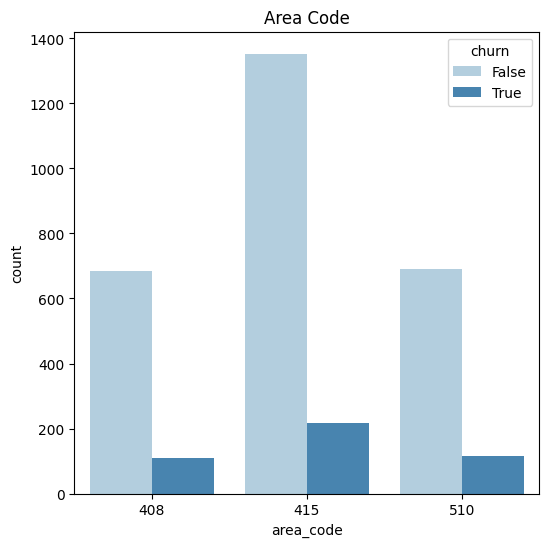

In [ ]:
#Plotting churn by area code
plt.figure(figsize=(6,6))
sns.countplot(x=df1['area_code'], hue=df1['churn'] , palette='Blues')
plt.title("Area Code")
plt.show()

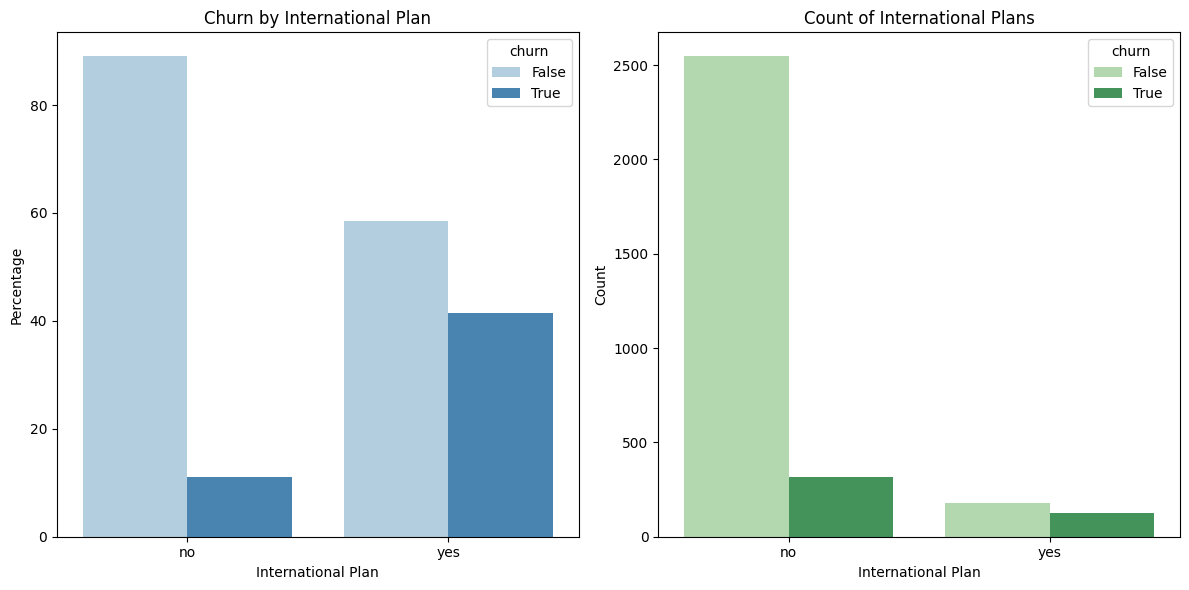

In [ ]:
# Calculate the percentages for churn by international plan
total_counts = df1['international_plan'].value_counts().sort_index()
churn_counts = df1.groupby(['international_plan', 'churn']).size().unstack().fillna(0)
churn_percentages = churn_counts.div(total_counts, axis=0) * 100

# Reset the index to make it easier to plot
churn_percentages = churn_percentages.reset_index()

# Melt the DataFrame for seaborn
churn_percentages = churn_percentages.melt(id_vars='international_plan', value_vars=churn_percentages.columns[1:],
                                           var_name='churn', value_name='percentage')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the percentages
sns.barplot(x='international_plan', y='percentage', hue='churn', data=churn_percentages, palette='Blues', ax=axes[0])
axes[0].set_title("Churn by International Plan")
axes[0].set_ylabel("Percentage")
axes[0].set_xlabel("International Plan")

# Plot the counts
sns.countplot(x=df1['international_plan'], hue=df1['churn'] , palette='Greens')
axes[1].set_title("Count of International Plans")
axes[1].set_ylabel("Count")
axes[1].set_xlabel("International Plan")

# Show the plots
plt.tight_layout()
plt.show()

These graphs suggest that having an international plan is associated with a higher churn rate. However, the majority of customers do not have an international plan. This could indicate that the international plan might not be meeting the expectations of the customers, leading to a higher churn rate.

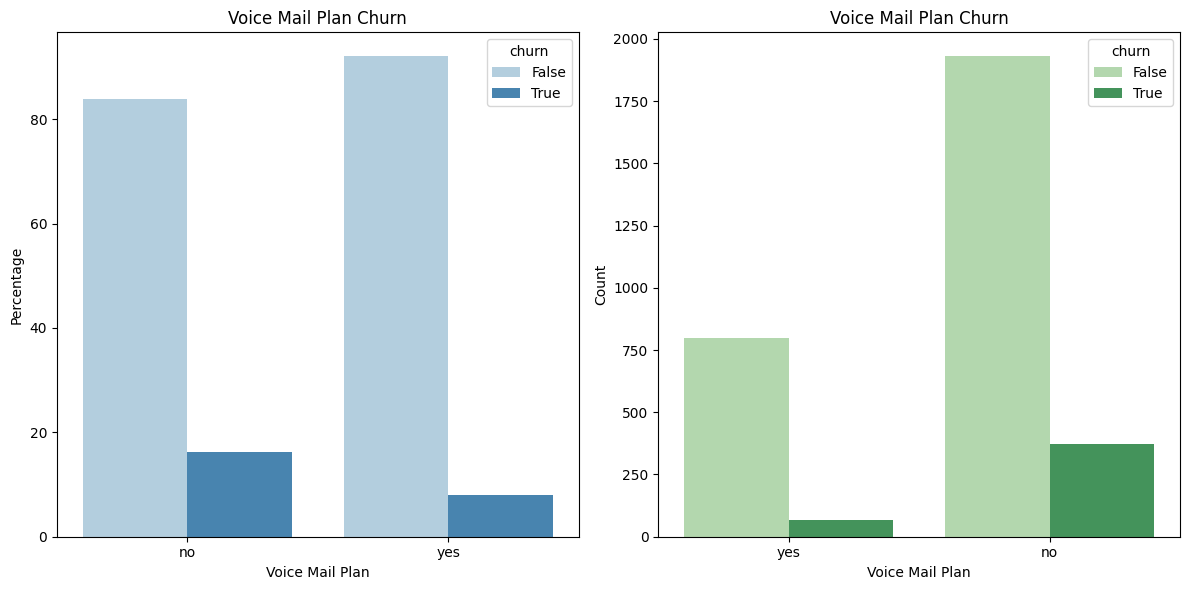

In [ ]:
#Plotting churn by Voicemail plan
# Calculate the percentages
total_counts_vmp = df1['voice_mail_plan'].value_counts().sort_index()
churn_counts_vmp = df1.groupby(['voice_mail_plan', 'churn']).size().unstack().fillna(0)
churn_percentages_vmp = churn_counts_vmp.div(total_counts_vmp, axis=0) * 100

# Reset the index to make it easier to plot
churn_percentages_vmp = churn_percentages_vmp.reset_index()

# Melt the DataFrame for seaborn
churn_percentages_vmp = churn_percentages_vmp.melt(id_vars='voice_mail_plan', value_vars=churn_percentages_vmp.columns[1:],
                                                   var_name='churn', value_name='percentage')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the percentages
sns.barplot(x='voice_mail_plan', y='percentage', hue='churn', data=churn_percentages_vmp, palette='Blues', ax=axes[0])
axes[0].set_title("Voice Mail Plan Churn")
axes[0].set_ylabel("Percentage")
axes[0].set_xlabel("Voice Mail Plan")

sns.countplot(x=df1['voice_mail_plan'], hue=df1['churn'] , palette='Greens')
axes[1].set_title("Voice Mail Plan Churn")
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Voice Mail Plan")

# Show the plots
plt.tight_layout()
plt.show()

This suggests that more customers continue with their service than those who discontinue, regardless of whether they have a voice mail plan or not.

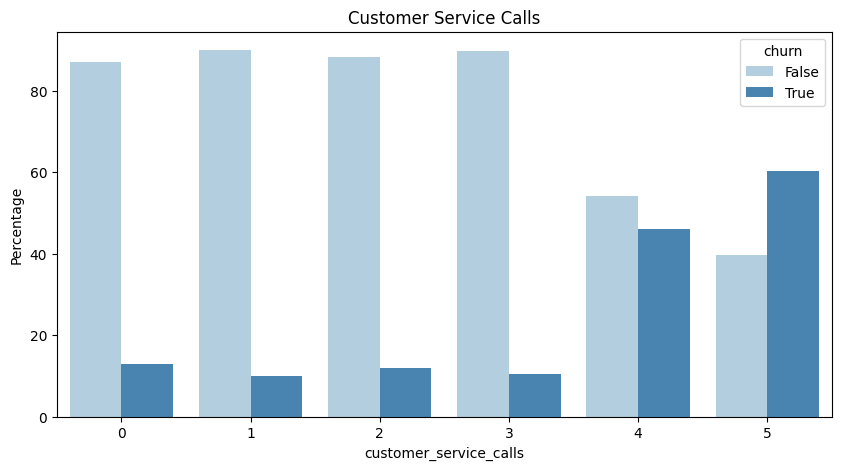

In [ ]:
#Plotting churn by customer service calls
# Calculate the percentages
total_counts_csc = df1['customer_service_calls'].value_counts().sort_index()
churn_counts_csc = df1.groupby(['customer_service_calls', 'churn']).size().unstack().fillna(0)
churn_percentages_csc = churn_counts_csc.div(total_counts_csc, axis=0) * 100

# Reset the index to make it easier to plot
churn_percentages_csc = churn_percentages_csc.reset_index()

# Melt the DataFrame for seaborn
churn_percentages_csc = churn_percentages_csc.melt(id_vars='customer_service_calls', value_vars=churn_percentages_csc.columns[1:],
                                                   var_name='churn', value_name='percentage')

# Plot the percentages
plt.figure(figsize=(10,5))
sns.barplot(x='customer_service_calls', y='percentage', hue='churn', data=churn_percentages_csc, palette='Blues')
plt.title("Customer Service Calls")
plt.ylabel("Percentage")
plt.show()

This graph suggests that customers who need to make more calls to customer service are more likely to stop doing business with the company. This could be due to various reasons such as dissatisfaction with the service, unresolved issues, or poor customer service experience. Conversely, customers who make fewer service calls are more likely to continue doing business with the company. This could indicate that they are satisfied with the product or service, or they do not encounter many issues that require contacting customer service.

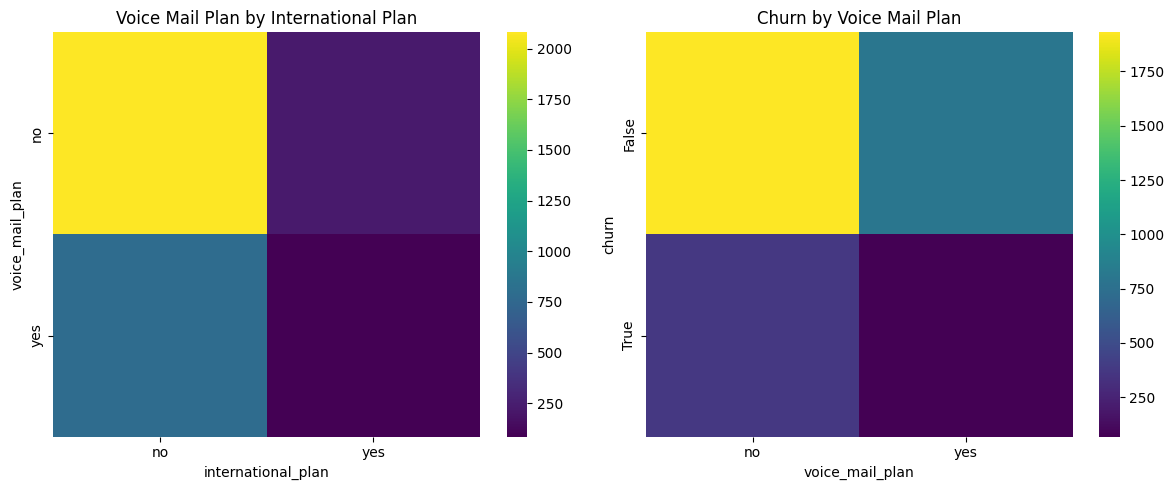

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First heatmap
df1_2dhist_1 = pd.DataFrame({
    x_label: grp['voice_mail_plan'].value_counts()
    for x_label, grp in df1.groupby('international_plan')
})
sns.heatmap(df1_2dhist_1, cmap='viridis', ax=axes[0])
axes[0].set_xlabel('international_plan')
axes[0].set_ylabel('voice_mail_plan')
axes[0].set_title('Voice Mail Plan by International Plan')

# Second heatmap
df1_2dhist_2 = pd.DataFrame({
    x_label: grp['churn'].value_counts()
    for x_label, grp in df1.groupby('voice_mail_plan')
})
sns.heatmap(df1_2dhist_2, cmap='viridis', ax=axes[1])
axes[1].set_xlabel('voice_mail_plan')
axes[1].set_ylabel('churn')
axes[1].set_title('Churn by Voice Mail Plan')

plt.tight_layout()
plt.show()


# 4. Data Pre-processing

In [ ]:
df1.dtypes

state                      object
account_length              int64
area_code                   int64
phone_number               object
international_plan         object
voice_mail_plan            object
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                        bool
dtype: object

In [ ]:
# Identify categorical columns
categorical_columns = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

# One-hot encode only the categorical columns
df1_categorical_encoded = pd.get_dummies(df1[categorical_columns])

# Select the non-categorical columns
non_categorical_columns = [col for col in df1.columns if col not in categorical_columns]
df1_non_categorical = df1[non_categorical_columns]

# Combine non-categorical columns with the one-hot encoded categorical columns
df1_combined = pd.concat([df1_non_categorical, df1_categorical_encoded], axis=1)

print(df1_combined)

      account_length phone_number  number_vmail_messages  total_day_minutes  \
0                128     382-4657                     25              265.1   
1                107     371-7191                     26              161.6   
2                137     358-1921                      0              243.4   
3                 84     375-9999                      0              299.4   
4                 75     330-6626                      0              166.7   
...              ...          ...                    ...                ...   
3328             192     414-4276                     36              156.2   
3329              68     370-3271                      0              231.1   
3330              28     328-8230                      0              180.8   
3331             184     364-6381                      0              213.8   
3332              74     400-4344                     25              234.4   

      total_day_calls  total_day_charge  total_eve_

In [ ]:
df1_combined.head()

,account_length,phone_number,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,382-4657,25,265.1,110,45.07,197.4,99,16.78,244.7,...,False,False,False,False,False,False,True,False,False,True
1,107,371-7191,26,161.6,123,27.47,195.5,103,16.62,254.4,...,False,False,False,False,False,False,True,False,False,True
2,137,358-1921,0,243.4,114,41.38,121.2,110,10.30,162.6,...,False,False,False,False,False,False,True,False,True,False
3,84,375-9999,0,299.4,71,50.90,61.9,88,5.26,196.9,...,False,False,False,False,False,False,False,True,True,False
4,75,330-6626,0,166.7,113,28.34,148.3,122,12.61,186.9,...,False,False,False,False,False,False,False,True,True,False


In [ ]:
# Select only numerical columns for VIF calculation
numerical_columns = df1_combined.select_dtypes(include=['float64', 'int64']).columns
X = df1_combined[numerical_columns]

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                   feature           VIF
0           account_length  7.386049e+00
1    number_vmail_messages  1.344873e+00
2        total_day_minutes  1.252969e+08
3          total_day_calls  2.443481e+01
4         total_day_charge  1.253015e+08
5        total_eve_minutes  3.739026e+07
6          total_eve_calls  2.453399e+01
7         total_eve_charge  3.739145e+07
8      total_night_minutes  1.073516e+07
9        total_night_calls  2.499769e+01
10      total_night_charge  1.073472e+07
11      total_intl_minutes  9.969106e+05
12        total_intl_calls  5.047916e+00
13       total_intl_charge  9.973101e+05
14  customer_service_calls  2.547323e+00
15               area_code  6.210874e+01


In [ ]:
# Drop derived columns
columns_to_drop = ['total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls','total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes', 'area_code']
df1_combined_reduced = df1_combined.drop(columns=columns_to_drop)

# Recompute VIF
numerical_columns = df1_combined_reduced.select_dtypes(include=['float64', 'int64']).columns
X_reduced = df1_combined_reduced[numerical_columns]

vif_data_reduced = pd.DataFrame()
vif_data_reduced["feature"] = X_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(len(X_reduced.columns))]

print(vif_data_reduced)


                  feature        VIF
0          account_length   6.853399
1   number_vmail_messages   1.340744
2        total_day_charge  10.245938
3        total_eve_charge  12.870226
4      total_night_charge  12.883021
5       total_intl_charge  12.318993
6  customer_service_calls   2.481703


Dropping the area_code column helped reduce the multicollinearity, as indicated by the lower VIF values for the remaining features.

* account_length: Moderate multicollinearity.
* number_vmail_messages: Low multicollinearity.
* total_day_charge, total_eve_charge, total_night_charge, total_intl_charge: Moderate multicollinearity.
* customer_service_calls: Low multicollinearity.

In [ ]:
df2 = df1_combined_reduced

In [ ]:
df2.head()

,account_length,phone_number,number_vmail_messages,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,customer_service_calls,churn,state_AK,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,382-4657,25,45.07,16.78,11.01,2.70,1,False,False,...,False,False,False,False,False,False,True,False,False,True
1,107,371-7191,26,27.47,16.62,11.45,3.70,1,False,False,...,False,False,False,False,False,False,True,False,False,True
2,137,358-1921,0,41.38,10.30,7.32,3.29,0,False,False,...,False,False,False,False,False,False,True,False,True,False
3,84,375-9999,0,50.90,5.26,8.86,1.78,2,False,False,...,False,False,False,False,False,False,False,True,True,False
4,75,330-6626,0,28.34,12.61,8.41,2.73,3,False,False,...,False,False,False,False,False,False,False,True,True,False


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3169 entries, 0 to 3332
Data columns (total 64 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3169 non-null   int64  
 1   phone_number            3169 non-null   object 
 2   number_vmail_messages   3169 non-null   int64  
 3   total_day_charge        3169 non-null   float64
 4   total_eve_charge        3169 non-null   float64
 5   total_night_charge      3169 non-null   float64
 6   total_intl_charge       3169 non-null   float64
 7   customer_service_calls  3169 non-null   int64  
 8   churn                   3169 non-null   bool   
 9   state_AK                3169 non-null   bool   
 10  state_AL                3169 non-null   bool   
 11  state_AR                3169 non-null   bool   
 12  state_AZ                3169 non-null   bool   
 13  state_CA                3169 non-null   bool   
 14  state_CO                3169 non-null   bool 

In [ ]:
# Define features (X) and target variable (y)
X = df2.drop(['churn', 'phone_number'], axis=1)  # Dropping 'churn' (target) and 'phone_number'
y = df2['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to verify the split
print("Training data shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing data shape - X_test:", X_test.shape, "y_test:", y_test.shape)

Training data shape - X_train: (2535, 62) y_train: (2535,)
Testing data shape - X_test: (634, 62) y_test: (634,)


 80-20 split, where 80% of the data is used for training and 20% for testing.

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Print the shapes of the scaled training and testing sets to verify
print("Scaled Training data shape - X_train_scaled:", X_train_scaled.shape, "y_train:", y_train.shape)
print("Scaled Testing data shape - X_test_scaled:", X_test_scaled.shape, "y_test:", y_test.shape)



Scaled Training data shape - X_train_scaled: (2535, 62) y_train: (2535,)
Scaled Testing data shape - X_test_scaled: (634, 62) y_test: (634,)


# 5. Modelling and Evaluation

In [ ]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Predict churn on the testing data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

#classification report and confusion matrix for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9100946372239748

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.98      0.95       536
        True       0.84      0.52      0.64        98

    accuracy                           0.91       634
   macro avg       0.88      0.75      0.80       634
weighted avg       0.91      0.91      0.90       634


Random Forest Confusion Matrix:
[[526  10]
 [ 47  51]]


In [ ]:
# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the scaled training data
gb_model.fit(X_train_scaled, y_train)

# Predict churn on the testing data
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# classification report and confusion matrix for Gradient Boosting
print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("\nGradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9211356466876972

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.97      0.95       536
        True       0.82      0.63      0.71        98

    accuracy                           0.92       634
   macro avg       0.88      0.80      0.83       634
weighted avg       0.92      0.92      0.92       634


Gradient Boosting Confusion Matrix:
[[522  14]
 [ 36  62]]


In [ ]:
# Initialize the KNN classifier
knn_model = KNeighborsClassifier()

# Train the model on the scaled training data
knn_model.fit(X_train_scaled, y_train)

# Predict churn on the testing data
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# classification report and confusion matrix for KNN
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nKNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.8359621451104101

KNN Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.97      0.91       536
        True       0.36      0.08      0.13        98

    accuracy                           0.84       634
   macro avg       0.61      0.53      0.52       634
weighted avg       0.78      0.84      0.79       634


KNN Confusion Matrix:
[[522  14]
 [ 90   8]]


In [ ]:
# Initialize the SVM classifier
svm_model = SVC(random_state=42)

# Train the model on the scaled training data
svm_model.fit(X_train_scaled, y_train)

# Predict churn on the testing data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# classification report and confusion matrix for SVM
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.8375394321766562

SVM Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.98      0.91       536
        True       0.31      0.04      0.07        98

    accuracy                           0.84       634
   macro avg       0.58      0.51      0.49       634
weighted avg       0.77      0.84      0.78       634


SVM Confusion Matrix:
[[527   9]
 [ 94   4]]


Random Forest Classifier:
* Accuracy: 91.0%
* Precision (how many of the predicted positives are actually positive): 92% for "False" and 84% for "True"
* Recall (how many of the actual positives were predicted correctly): 98% for "False" and 52% for "True"
* F1-score (harmonic mean of precision and recall): 95% for "False" and 64% for "True"
<br><br>
Gradient Boosting Classifier:
* Accuracy: 92.1%
* Precision: 94% for "False" and 82% for "True"
* Recall: 97% for "False" and 63% for "True"
* F1-score: 95% for "False" and 71% for "True"
<br><br>
K-Nearest Neighbors (KNN) Classifier:
*Accuracy:83.6%
*Precision: 85% for "False" and 36% for "True"
*Recall: 97% for "False" and 8% for "True
*F1-score: 91% for "False" and 13% for "True"

<br><br>
Support Vector Machne:
* Accuracy: 83.8%
* Precision: 85% for "False" and 31% for "True"
* Recall: 98% for "False" and 4% for "True"
* F1-score: 91% for "False" and 7% for "True"

Analysis:

* Both Random Forest and Gradient Boosting classifiers achieve high accuracy, with Gradient Boosting slightly outperforming Random Forest in terms of recall and F1-score for the True class (churn).
* KNN, while still achieving a decent accuracy, performs noticeably worse in terms of recall and F1-score for the True class. This suggests that KNN may not be as effective as Random Forest and Gradient Boosting for this particular dataset and problem.
* The SVM model achieves an accuracy of around 83.8%, which is decent but the precision, recall, and F1-score for the True class (churn) are considerably lower compared to the other models, indicating that the SVM model has difficulties accurately identifying churn cases.
* Based on these results, Gradient Boosting seems to be the best-performing model among the three for churn prediction in this scenario.

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Score (Cross-Validation Accuracy): 0.9420118343195266

Best Gradient Boosting Accuracy: 0.9211356466876972

Best Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.97      0.95       536
        True       0.82      0.63      0.71        98

    accuracy                           0.92       634
   macro avg       0.88      0.80      0.83       634
weighted avg       0.92      0.92      0.92       634


Best Gradient Boosting Confusion Matrix:
[[522  14]
 [ 36  62]]


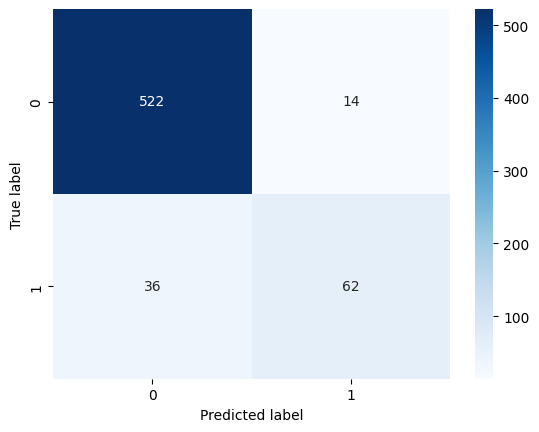

In [ ]:
# Grid Search Cross-Validation for Gradient Boosting Model
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialization
gb_model_tuned = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(estimator=gb_model_tuned, param_grid=param_grid, cv=5)

# Grid Search CV on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Getting best hyperparameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score (Cross-Validation Accuracy):", best_score)

# Getting best model from the grid search
best_gb_model = grid_search.best_estimator_

# Predict churn on the testing data using the best model
y_pred_best_gb = best_gb_model.predict(X_test_scaled)

# Evaluate the best Gradient Boosting model
accuracy_best_gb = accuracy_score(y_test, y_pred_best_gb)
print("\nBest Gradient Boosting Accuracy:", accuracy_best_gb)

# classification report and confusion matrix for the best Gradient Boosting model
print("\nBest Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_best_gb))

print("\nBest Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_gb))

def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

plot_confusion_matrix(y_test, y_pred_best_gb, [0,1])

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Score (Cross-Validation Accuracy) for Random Forest: 0.9258382642998028

Best Random Forest Accuracy: 0.917981072555205

Best Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.99      0.95       536
        True       0.88      0.54      0.67        98

    accuracy                           0.92       634
   macro avg       0.90      0.76      0.81       634
weighted avg       0.92      0.92      0.91       634


Best Random Forest Confusion Matrix:
[[529   7]
 [ 45  53]]


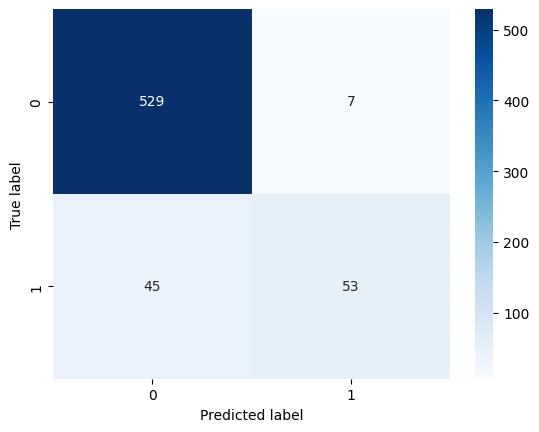

In [ ]:
# Grid Search Cross-Validation for Random Forest Model
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 2, 3, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialization
rf_model_tuned = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid_rf, cv=5)

# Grid Search CV on the scaled training data
grid_search_rf.fit(X_train_scaled, y_train)

# Getting best hyperparameters and best score from the grid search
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Score (Cross-Validation Accuracy) for Random Forest:", best_score_rf)

# Get the best Random Forest model from the grid search
best_rf_model = grid_search_rf.best_estimator_

# Predict churn on the testing data using the best Random Forest model
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the best Random Forest model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("\nBest Random Forest Accuracy:", accuracy_best_rf)

# Print classification report and confusion matrix for the best Random Forest model
print("\nBest Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

print("\nBest Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))

def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

plot_confusion_matrix(y_test, y_pred_best_rf, [0,1])

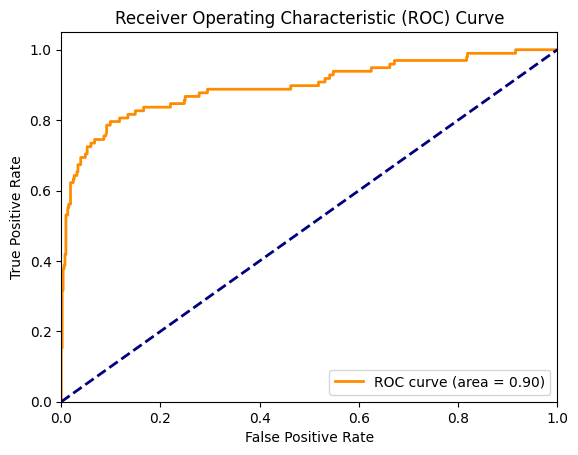

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_pred_proba_best_gb = best_gb_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best_gb)
roc_auc = roc_auc_score(y_test, y_pred_proba_best_gb)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

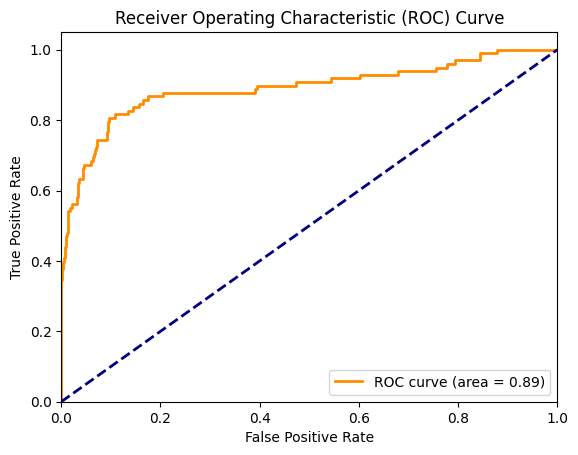

In [51]:
y_pred_proba_best_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best_rf)
roc_auc = roc_auc_score(y_test, y_pred_proba_best_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Analysis:


Both the fine-tuned Gradient Boosting and Random Forest models show good performance, with the Gradient Boosting model slightly outperforming the Random Forest model in terms of recall and F1-score for the True class (churn).

<ipython-input-56-e1142e9a107c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=feature_importances[top_indices], palette="viridis")


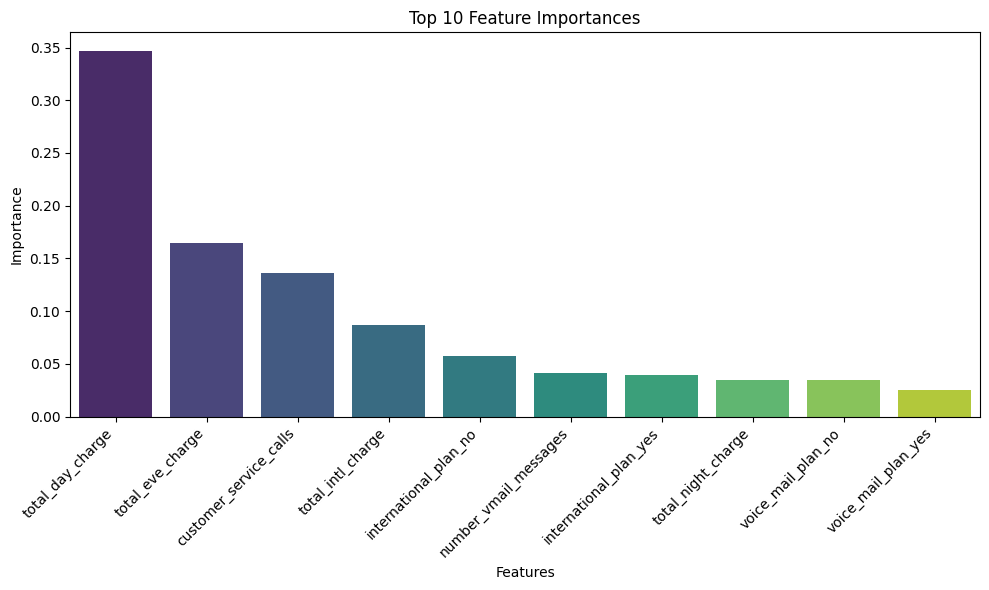

In [56]:
# Fit the best model again to get feature importances
best_gb_model.fit(X_train_scaled, y_train)

# Get feature importances from the best model
feature_importances = best_gb_model.feature_importances_

# Get indices of the top 10 feature importances
top_indices = feature_importances.argsort()[-10:][::-1]

# Get corresponding feature names
top_features = X_train.columns[top_indices]

# Plotting the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=feature_importances[top_indices], palette="viridis")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Initialize the Gradient Boosting classifier with the best hyperparameters
final_gb_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=200, random_state=42)

# Combine the training and testing data for final model training
X_final = np.vstack((X_train_scaled, X_test_scaled))
y_final = np.concatenate((y_train, y_test))

# Train the final Gradient Boosting model on the combined data
final_gb_model.fit(X_final, y_final)

# Save the final Gradient Boosting model for future use
import joblib
joblib.dump(final_gb_model, 'final_gradient_boosting_model.pkl')

['final_gradient_boosting_model.pkl']

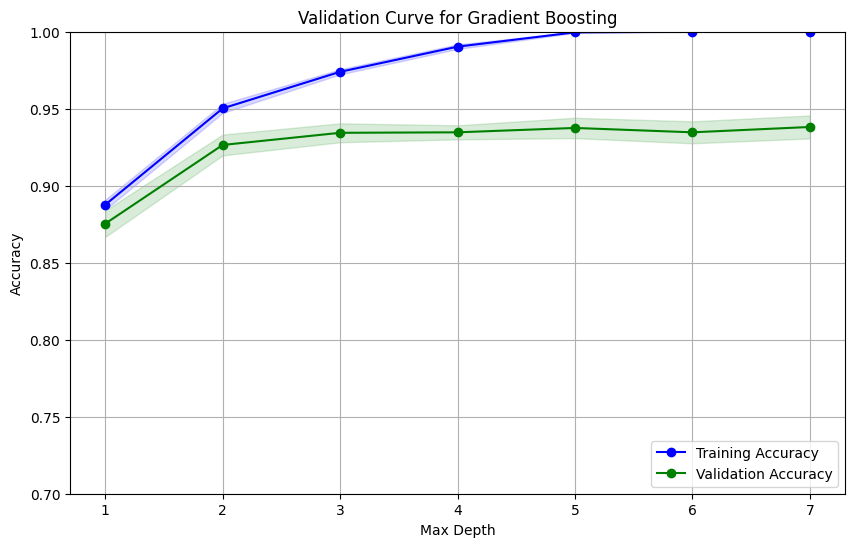

In [ ]:
# Define the range of values to test for the max_depth hyperparameter
param_range = [1, 2, 3, 4, 5, 6, 7]

# Compute validation curve for max_depth
train_scores, test_scores = validation_curve(
    GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, random_state=42),
    X_final, y_final,
    param_name='max_depth', param_range=param_range,
    cv=5, scoring='accuracy'
)

# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title('Validation Curve for Gradient Boosting')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.xticks(param_range)
plt.plot(param_range, train_mean, label='Training Accuracy', color='blue', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, label='Validation Accuracy', color='green', marker='o')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 7. Conclusion

# 8. Recommendation

# 9. Next Steps